In [ ]:
# mudelsss
import os
import sys
import subprocess
import time
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
# load data
# /home/labs/pilpel/barc/sexy_yeast/Results/100runs/sumsumiii_20250422_104748_L_3000_gen7_fitness_sherrington_kirkpatrick_runs100_beta0.0_rho0.25_initial_fitness_seed0.0/run_metrics.csv
# /home/labs/pilpel/barc/sexy_yeast/Results/100runs/sumsumiii_20250422_104748_L_3000_gen7_fitness_sherrington_kirkpatrick_runs100_beta0.0_rho0.25_initial_fitness_seed0.0/aggregated_stats.json
# /home/labs/pilpel/barc/sexy_yeast/Results/100runs/sumsumiii_20250422_104748_L_3000_gen7_fitness_sherrington_kirkpatrick_runs100_beta0.0_rho0.25_initial_fitness_seed0.0/run_metrics.json
def load_data():
    import pandas as pd
    import json
    import os

    # Define the file paths
    csv_file_path = "/home/labs/pilpel/barc/sexy_yeast/Results/100runs/sumsumiii_20250422_104748_L_3000_gen7_fitness_sherrington_kirkpatrick_runs100_beta0.0_rho0.25_initial_fitness_seed0.0/run_metrics.csv"
    json_file_path = "/home/labs/pilpel/barc/sexy_yeast/Results/100runs/sumsumiii_20250422_104748_L_3000_gen7_fitness_sherrington_kirkpatrick_runs100_beta0.0_rho0.25_initial_fitness_seed0.0/aggregated_stats.json"
    metrics_json_file_path = "/home/labs/pilpel/barc/sexy_yeast/Results/100runs/sumsumiii_20250422_104748_L_3000_gen7_fitness_sherrington_kirkpatrick_runs100_beta0.0_rho0.25_initial_fitness_seed0.0/run_metrics.json"

    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Load the JSON files
    with open(json_file_path, 'r') as f:
        aggregated_stats = json.load(f)

    with open(metrics_json_file_path, 'r') as f:
        metrics_json = json.load(f)

    return df, aggregated_stats, metrics_json


# load data
df, aggregated_stats, metrics_json = load_data()
# print data
display("DataFrame:")
# pl. setiing col limit none
pd.set_option('display.max_columns', None)

display(df.head())


'DataFrame:'

,run_id,initial_fitness,final_fitness,fitness_improvement_percent,final_population,final_fitness_std,dominant_avg_offspring_fitness,dominant_fitness_improvement,dominant_avg_genomic_distance,dominant_parent_fitness_r2,dominant_parent_fitness_slope,dominant_distance_fitness_r2,dominant_distance_fitness_slope,dominant_parent_fitness_slope_sign,dominant_distance_fitness_slope_sign,recessive_avg_offspring_fitness,recessive_fitness_improvement,recessive_avg_genomic_distance,recessive_parent_fitness_r2,recessive_parent_fitness_slope,recessive_distance_fitness_r2,recessive_distance_fitness_slope,recessive_parent_fitness_slope_sign,recessive_distance_fitness_slope_sign,codominant_avg_offspring_fitness,codominant_fitness_improvement,codominant_avg_genomic_distance,codominant_parent_fitness_r2,codominant_parent_fitness_slope,codominant_distance_fitness_r2,codominant_distance_fitness_slope,codominant_parent_fitness_slope_sign,codominant_distance_fitness_slope_sign
0,1,0.003193,-1.377653,-43244.930395,128,4.322701,-0.110929,1.266724,0.003912,0.364110,0.740183,0.049997,664.950541,positive,positive,-2.644377,-1.266724,0.003912,0.623887,1.259817,0.002270,-184.244577,positive,negative,-1.377653,-1.223615e-15,0.003912,1.0,1.0,0.009829,240.352982,positive,positive
1,2,0.368790,1.198148,224.886194,128,5.494008,-1.382449,-2.580596,0.004110,0.571457,0.921577,0.090275,-1094.712099,positive,negative,3.778744,2.580596,0.004110,0.646145,1.078423,0.011311,426.427314,positive,positive,1.198148,-4.028820e-15,0.004110,1.0,1.0,0.012500,-334.142393,positive,negative
2,3,3.690194,3.661265,-0.783940,128,7.008989,3.775886,0.114621,0.004580,0.768697,1.021849,0.005105,-278.404074,positive,negative,3.546644,-0.114621,0.004580,0.752792,0.978151,0.000054,27.745221,positive,positive,3.661265,4.289821e-15,0.004580,1.0,1.0,0.001405,-125.329427,positive,negative
3,4,-1.512011,-1.767978,16.928936,128,3.911058,-0.514799,1.253179,0.003252,0.599438,1.277985,0.018974,507.046577,positive,positive,-3.021157,-1.253179,0.003252,0.323253,0.722015,0.020317,-403.661862,positive,negative,-1.767978,-7.849282e-16,0.003252,1.0,1.0,0.000537,51.692357,positive,positive
4,5,2.876494,2.806087,-2.447669,128,4.503935,3.316207,0.510120,0.004964,0.617478,1.184495,0.014970,-365.240369,positive,negative,2.295967,-0.510120,0.004964,0.433480,0.815505,0.000487,54.113033,positive,positive,2.806087,3.493200e-15,0.004964,1.0,1.0,0.006170,-155.563668,positive,negative


Starting analysis of yeast genetic algorithm data...

=== Basic Dataset Statistics ===
Number of runs: 100

=== Summary Statistics for Key Metrics ===
       initial_fitness  final_fitness  fitness_improvement_percent  \
count       100.000000     100.000000                   100.000000   
mean          0.152232       0.165069                 -1915.581812   
std           1.414018       2.015876                 12241.089501   
min          -2.825757      -4.368939                -88852.736118   
25%          -0.593566      -1.148782                  -264.416525   
50%           0.004112       0.081349                    -1.615805   
75%           0.812411       1.510748                   106.483767   
max           4.303319       5.908531                 29547.932349   

       dominant_fitness_improvement  codominant_fitness_improvement  
count                    100.000000                    1.000000e+02  
mean                       0.042515                    2.223227e-16  
std     

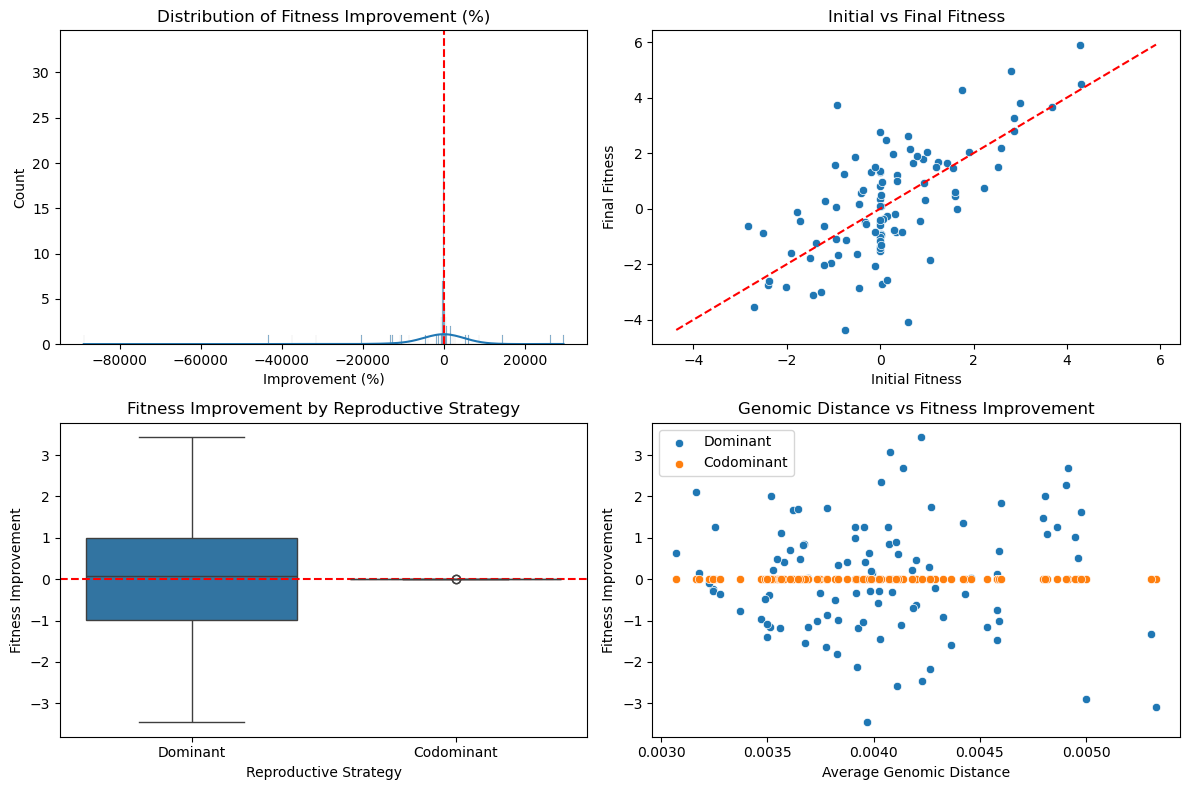


=== Statistical Tests ===
Paired t-test (initial vs final fitness): t=-0.0867, p=0.9311
Paired t-test (dominant vs codominant): t=0.3066, p=0.7598

=== Correlation Analysis ===
Dominant strategy - Distance vs Improvement correlation: r=0.0208, p=0.8371
Codominant strategy - Distance vs Improvement correlation: r=0.0087, p=0.9316

=== R² Analysis ===
Dominant parent fitness R² (avg): 0.5247
Codominant parent fitness R² (avg): 1.0000
Dominant distance fitness R² (avg): 0.0305
Codominant distance fitness R² (avg): 0.0197

=== Slope Direction Analysis ===
Dominant parent fitness slope positive: 100.0%
Dominant distance fitness slope positive: 53.0%
Codominant parent fitness slope positive: 100.0%
Codominant distance fitness slope positive: 50.0%

Runs with fitness improvement: 48 (48.0%)
Runs where dominant strategy outperformed codominant: 52 (52.0%)


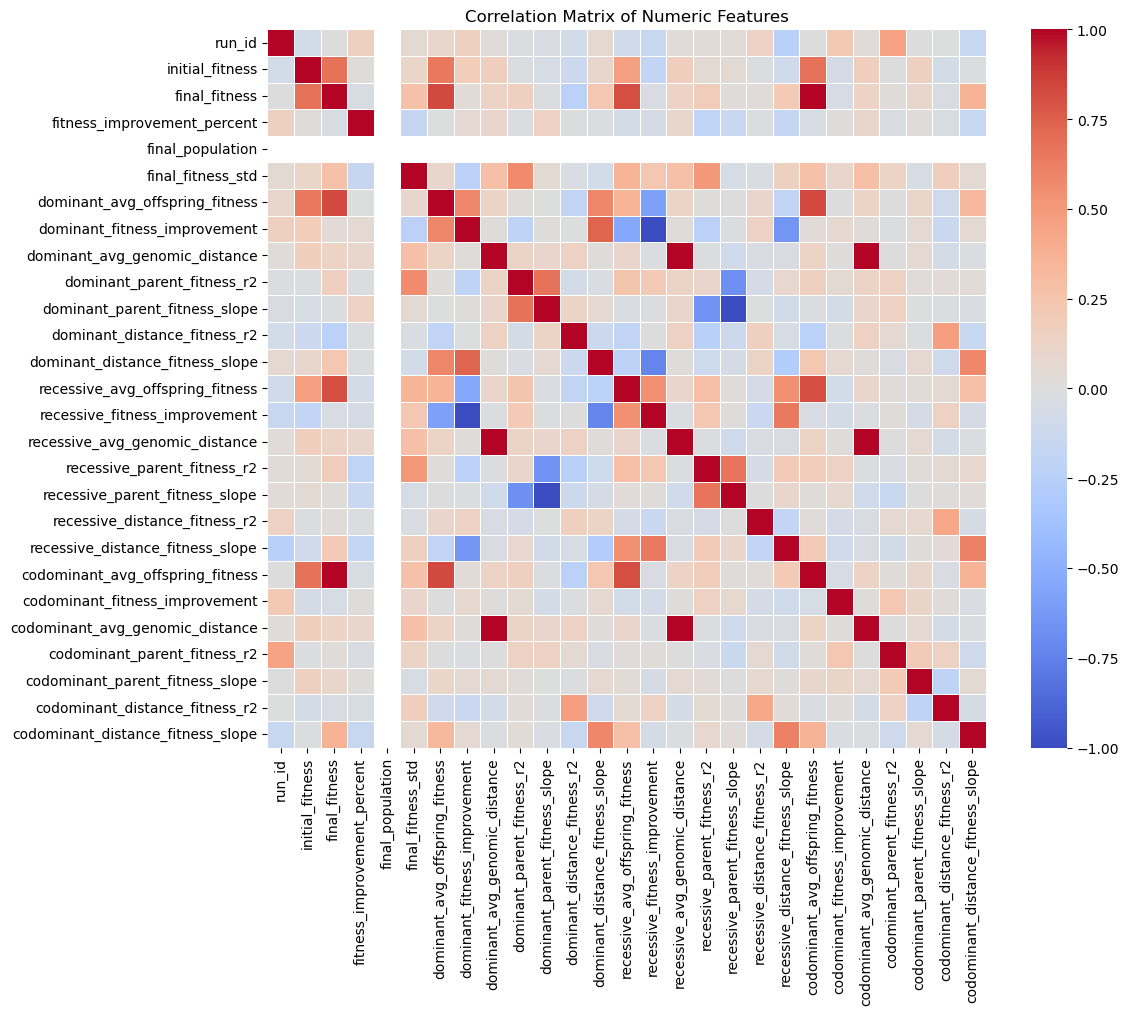


=== Top 5 Feature Correlations ===
1. final_fitness & initial_fitness: 0.6788
2. fitness_improvement_percent & run_id: 0.1494
3. final_population & run_id: nan
4. final_population & initial_fitness: nan
5. final_population & final_fitness: nan


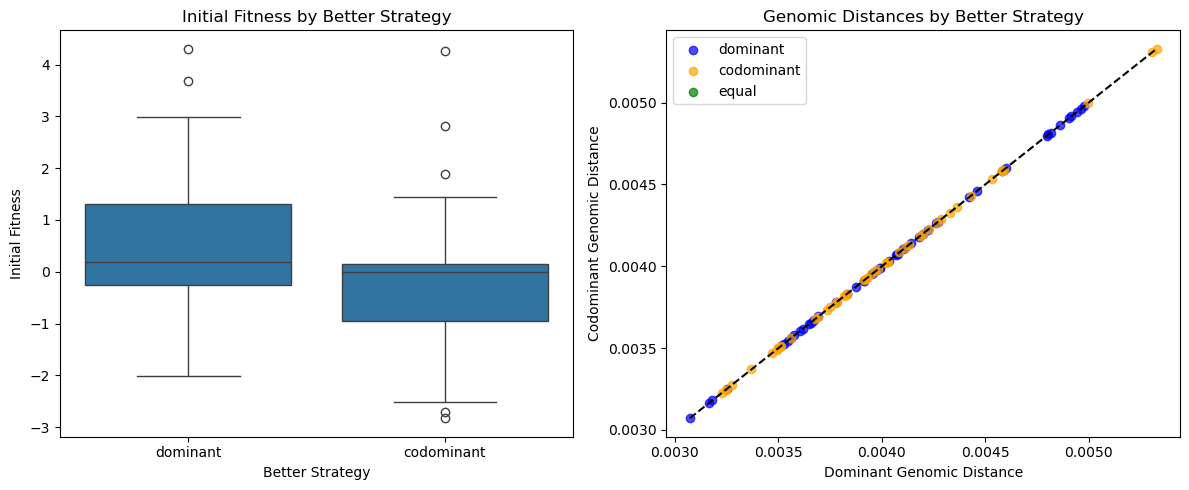


=== Strategy Performance Analysis ===
dominant: 52 runs (52.0%)
codominant: 48 runs (48.0%)

Initial fitness comparison (dominant better vs codominant better): t=2.9025, p=0.0046
Dominant genomic distance comparison: t=0.8639, p=0.3898
Codominant genomic distance comparison: t=0.8639, p=0.3898

Analysis completed!


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_yeast_data(df):
    """
    Analyze genetic algorithm data focused on fitness metrics across different runs
    
    Parameters:
    df (DataFrame): DataFrame containing run metrics data
    """
    # Basic statistics
    print("=== Basic Dataset Statistics ===")
    print(f"Number of runs: {len(df)}")
    print("\n=== Summary Statistics for Key Metrics ===")
    
    metrics_to_analyze = [
        'initial_fitness', 'final_fitness', 'fitness_improvement_percent',
        'dominant_fitness_improvement', 'codominant_fitness_improvement'
    ]
    
    print(df[metrics_to_analyze].describe())
    
    # Plot fitness improvement distribution
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(df['fitness_improvement_percent'], kde=True)
    plt.title('Distribution of Fitness Improvement (%)')
    plt.xlabel('Improvement (%)')
    plt.axvline(0, color='red', linestyle='--')
    
    # Compare initial vs final fitness
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='initial_fitness', y='final_fitness', data=df)
    plt.title('Initial vs Final Fitness')
    plt.xlabel('Initial Fitness')
    plt.ylabel('Final Fitness')
    # Add diagonal line for reference
    min_val = min(df['initial_fitness'].min(), df['final_fitness'].min())
    max_val = max(df['initial_fitness'].max(), df['final_fitness'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    # Compare reproductive strategies
    plt.subplot(2, 2, 3)
    data_to_plot = df[['dominant_fitness_improvement', 'codominant_fitness_improvement']].melt()
    sns.boxplot(x='variable', y='value', data=data_to_plot)
    plt.title('Fitness Improvement by Reproductive Strategy')
    plt.xlabel('Reproductive Strategy')
    plt.ylabel('Fitness Improvement')
    plt.xticks(ticks=[0, 1], labels=['Dominant', 'Codominant'])
    plt.axhline(0, color='red', linestyle='--')
    
    # Correlation between genomic distance and fitness improvement
    plt.subplot(2, 2, 4)
    sns.scatterplot(
        x='dominant_avg_genomic_distance', 
        y='dominant_fitness_improvement', 
        data=df, 
        label='Dominant'
    )
    sns.scatterplot(
        x='codominant_avg_genomic_distance', 
        y='codominant_fitness_improvement', 
        data=df, 
        label='Codominant'
    )
    plt.title('Genomic Distance vs Fitness Improvement')
    plt.xlabel('Average Genomic Distance')
    plt.ylabel('Fitness Improvement')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Statistical tests
    print("\n=== Statistical Tests ===")
    
    # Paired t-test comparing initial and final fitness
    t_stat, p_val = stats.ttest_rel(df['initial_fitness'], df['final_fitness'])
    print(f"Paired t-test (initial vs final fitness): t={t_stat:.4f}, p={p_val:.4f}")
    
    # Paired t-test comparing dominant and codominant strategies
    t_stat, p_val = stats.ttest_rel(df['dominant_fitness_improvement'], df['codominant_fitness_improvement'])
    print(f"Paired t-test (dominant vs codominant): t={t_stat:.4f}, p={p_val:.4f}")
    
    # Correlation analysis
    print("\n=== Correlation Analysis ===")
    
    # Correlation between genomic distance and fitness improvement
    dom_corr, dom_p = stats.pearsonr(df['dominant_avg_genomic_distance'], df['dominant_fitness_improvement'])
    codom_corr, codom_p = stats.pearsonr(df['codominant_avg_genomic_distance'], df['codominant_fitness_improvement'])
    
    print(f"Dominant strategy - Distance vs Improvement correlation: r={dom_corr:.4f}, p={dom_p:.4f}")
    print(f"Codominant strategy - Distance vs Improvement correlation: r={codom_corr:.4f}, p={codom_p:.4f}")
    
    # R² analysis
    print("\n=== R² Analysis ===")
    print(f"Dominant parent fitness R² (avg): {df['dominant_parent_fitness_r2'].mean():.4f}")
    print(f"Codominant parent fitness R² (avg): {df['codominant_parent_fitness_r2'].mean():.4f}")
    print(f"Dominant distance fitness R² (avg): {df['dominant_distance_fitness_r2'].mean():.4f}")
    print(f"Codominant distance fitness R² (avg): {df['codominant_distance_fitness_r2'].mean():.4f}")
    
    # Directional analysis - slope signs
    print("\n=== Slope Direction Analysis ===")
    dom_parent_slope_pos = (df['dominant_parent_fitness_slope_sign'] == 'positive').mean() * 100
    dom_distance_slope_pos = (df['dominant_distance_fitness_slope_sign'] == 'positive').mean() * 100
    codom_parent_slope_pos = (df['codominant_parent_fitness_slope_sign'] == 'positive').mean() * 100
    codom_distance_slope_pos = (df['codominant_distance_fitness_slope_sign'] == 'positive').mean() * 100
    
    print(f"Dominant parent fitness slope positive: {dom_parent_slope_pos:.1f}%")
    print(f"Dominant distance fitness slope positive: {dom_distance_slope_pos:.1f}%")
    print(f"Codominant parent fitness slope positive: {codom_parent_slope_pos:.1f}%")
    print(f"Codominant distance fitness slope positive: {codom_distance_slope_pos:.1f}%")
    
    # Advanced analysis - check which runs showed improvement
    improved_runs = df[df['fitness_improvement_percent'] > 0]
    print(f"\nRuns with fitness improvement: {len(improved_runs)} ({len(improved_runs)/len(df)*100:.1f}%)")
    
    # Is dominant or codominant better for improvement?
    dom_better = df[df['dominant_fitness_improvement'] > df['codominant_fitness_improvement']]
    print(f"Runs where dominant strategy outperformed codominant: {len(dom_better)} ({len(dom_better)/len(df)*100:.1f}%)")
    
    return {
        "improved_runs_percent": len(improved_runs)/len(df)*100,
        "dominant_better_percent": len(dom_better)/len(df)*100,
        "avg_fitness_improvement": df['fitness_improvement_percent'].mean(),
        "dominant_distance_corr": dom_corr,
        "codominant_distance_corr": codom_corr
    }

def generate_heatmap(df):
    """Generate correlation heatmap for numeric columns"""
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
                linewidths=0.5, square=True)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()
    
    # Return the top 5 correlations (excluding self-correlations)
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                              corr_matrix.iloc[i, j]))
    
    # Sort by absolute correlation value
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    print("\n=== Top 5 Feature Correlations ===")
    for i, (col1, col2, corr) in enumerate(corr_pairs[:5]):
        print(f"{i+1}. {col1} & {col2}: {corr:.4f}")

def analyze_strategy_performance(df):
    """Analyze which strategy performs better under different conditions"""
    # Create a new column indicating which strategy was better
    df['better_strategy'] = 'equal'
    df.loc[df['dominant_fitness_improvement'] > df['codominant_fitness_improvement'], 'better_strategy'] = 'dominant'
    df.loc[df['dominant_fitness_improvement'] < df['codominant_fitness_improvement'], 'better_strategy'] = 'codominant'
    
    # Plot initial fitness vs better strategy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='better_strategy', y='initial_fitness', data=df)
    plt.title('Initial Fitness by Better Strategy')
    plt.xlabel('Better Strategy')
    plt.ylabel('Initial Fitness')
    
    # Plot genomic distance vs better strategy
    plt.subplot(1, 2, 2)
    strategies = ['dominant', 'codominant', 'equal']
    colors = ['blue', 'orange', 'green']
    
    for strategy, color in zip(strategies, colors):
        strategy_df = df[df['better_strategy'] == strategy]
        plt.scatter(
            strategy_df['dominant_avg_genomic_distance'],
            strategy_df['codominant_avg_genomic_distance'],
            color=color,
            label=strategy,
            alpha=0.7
        )
    
    plt.title('Genomic Distances by Better Strategy')
    plt.xlabel('Dominant Genomic Distance')
    plt.ylabel('Codominant Genomic Distance')
    plt.legend()
    
    # Add diagonal line
    min_val = min(df['dominant_avg_genomic_distance'].min(), df['codominant_avg_genomic_distance'].min())
    max_val = max(df['dominant_avg_genomic_distance'].max(), df['codominant_avg_genomic_distance'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis of when each strategy is better
    print("\n=== Strategy Performance Analysis ===")
    strategy_counts = df['better_strategy'].value_counts()
    for strategy, count in strategy_counts.items():
        print(f"{strategy}: {count} runs ({count/len(df)*100:.1f}%)")
    
    # When is dominant better?
    dom_better = df[df['better_strategy'] == 'dominant']
    codom_better = df[df['better_strategy'] == 'codominant']
    
    if len(dom_better) > 0 and len(codom_better) > 0:
        # Compare initial fitness
        t_stat, p_val = stats.ttest_ind(dom_better['initial_fitness'], codom_better['initial_fitness'])
        print(f"\nInitial fitness comparison (dominant better vs codominant better): t={t_stat:.4f}, p={p_val:.4f}")
        
        # Compare genomic distances
        t_stat, p_val = stats.ttest_ind(dom_better['dominant_avg_genomic_distance'], 
                                       codom_better['dominant_avg_genomic_distance'])
        print(f"Dominant genomic distance comparison: t={t_stat:.4f}, p={p_val:.4f}")
        
        t_stat, p_val = stats.ttest_ind(dom_better['codominant_avg_genomic_distance'], 
                                       codom_better['codominant_avg_genomic_distance'])
        print(f"Codominant genomic distance comparison: t={t_stat:.4f}, p={p_val:.4f}")

# Main analysis function
def main_analysis(df):
    """Run the complete analysis pipeline"""
    print("Starting analysis of yeast genetic algorithm data...\n")
    
    # Clean the data
    # Handle missing values if needed
    df = df.copy()
    
    # Basic analysis
    results = analyze_yeast_data(df)
    
    # Generate correlation heatmap
    generate_heatmap(df)
    
    # Analyze strategy performance
    analyze_strategy_performance(df)
    
    return results

# Execute the analysis
if __name__ == "__main__":
    # Assuming df is already loaded
    # df, aggregated_stats, metrics_json = load_data()
    
    # For demonstration, create a sample dataframe if needed
    # df = pd.read_csv('path_to_your_data.csv')
    
    results = main_analysis(df)
    print("\nAnalysis completed!")